In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white',context='notebook',palette='deep')

## Data manipulating

In [11]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

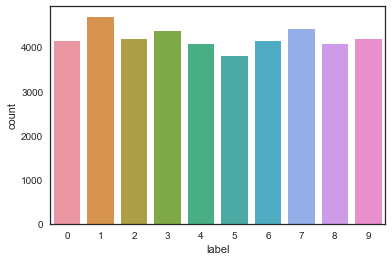

In [12]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis=1)
del train
g = sns.countplot(Y_train)
Y_train.value_counts()

In [13]:
# check Data(correupted images)
#train data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [17]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [18]:
# Normalize
X_train = X_train/255
test = test/255

In [19]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [21]:
# Label encoding
Y_train = to_categorical(Y_train,num_classes=10)

In [25]:
# Cross validation data set split
random_seed = 2
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,random_state = random_seed)

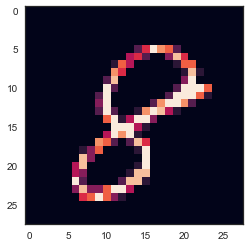

In [34]:
g = plt.imshow(X_train[0][:,:,0])

## Convolutional Neural Network

In [35]:
# Set the CNN model 
# CNN architechture：In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [36]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [37]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [39]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [40]:
epochs = 30
batch_size = 86

In [41]:
# Augment data to decrease overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [42]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 218s - loss: 0.4067 - acc: 0.8690 - val_loss: 0.0709 - val_acc: 0.9786
Epoch 2/30
 - 209s - loss: 0.1302 - acc: 0.9608 - val_loss: 0.0367 - val_acc: 0.9895
Epoch 3/30
 - 208s - loss: 0.0945 - acc: 0.9702 - val_loss: 0.0367 - val_acc: 0.9881
Epoch 4/30
 - 210s - loss: 0.0797 - acc: 0.9763 - val_loss: 0.0297 - val_acc: 0.9912
Epoch 5/30
 - 208s - loss: 0.0722 - acc: 0.9788 - val_loss: 0.0325 - val_acc: 0.9890
Epoch 6/30
 - 209s - loss: 0.0684 - acc: 0.9797 - val_loss: 0.0386 - val_acc: 0.9907
Epoch 7/30
 - 209s - loss: 0.0643 - acc: 0.9818 - val_loss: 0.0274 - val_acc: 0.9917
Epoch 8/30
 - 206s - loss: 0.0614 - acc: 0.9827 - val_loss: 0.0237 - val_acc: 0.9926
Epoch 9/30
 - 209s - loss: 0.0626 - acc: 0.9829 - val_loss: 0.0229 - val_acc: 0.9929
Epoch 10/30
 - 208s - loss: 0.0603 - acc: 0.9825 - val_loss: 0.0279 - val_acc: 0.9921
Epoch 11/30
 - 209s - loss: 0.0594 - acc: 0.9833 - val_loss: 0.0238 - val_acc: 0.9929
Epoch 12/30
 - 208s - loss: 0.0622 - acc: 0.9830 - val_loss: 0.

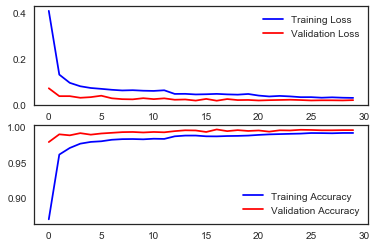

In [52]:
# Plot Loss
fig,ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b',label="Training Loss")
ax[0].plot(history.history['val_loss'],color='r',label="Validation Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'],color='b',label="Training Accuracy")
ax[1].plot(history.history['val_acc'],color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [53]:
results = model.predict(test)
results = np.argmax(results,axis=1)
results = pd.Series(results,name="Label")

In [54]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)